# MOwNiT - Wybrane zagadnienia algebry liniowej i faktoryzacja

Biblioteką w pythonie do algebry liniowej są:
- `numpy.linalg` https://numpy.org/doc/stable/reference/routines.linalg.html
- `scipy.linalg` https://docs.scipy.org/doc/scipy/reference/linalg.html


In [8]:
import numpy as np
import scipy as sc

### Sposoby rozwiązania równań macierzowych Ax=b

In [4]:
A=np.random.randint(0,10,(4,4))
print(A)

b=np.random.randint(0,10,4)
print(b)

[[1 9 7 0]
 [2 2 1 0]
 [2 1 5 1]
 [8 4 3 9]]
[1 9 4 5]


Metoda macierzy odwrotnej:
$$Ax=b\ \Rightarrow\ x=A^{-1}b$$

In [5]:
#mozemy policzyc odwrotność macierzy i wymnożyć
# uwaga: nieefektywne!
(np.linalg.inv(A)).dot(b)

array([ 4.81430746, -0.11719939, -0.39421613, -3.54033486])

In [7]:
#najlepiej używać dedykowanej funkcji solve
x=np.linalg.solve(A,b)
print(x)

[ 4.81430746 -0.11719939 -0.39421613 -3.54033486]


### Faktoryzacja LU

In [10]:
# W przypadku ogólnej macierzy kwadratowej jest to faktoryzacja LU z pivotem
P,L,U=sc.linalg.lu(A)
print(P) #macierz permutacji
print(L) #dolna trójkątna
print(U) #górna trójkątna

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.125       1.          0.          0.        ]
 [ 0.25        0.          1.          0.        ]
 [ 0.25        0.11764706 -0.12456747  1.        ]]
[[ 8.         4.         3.         9.       ]
 [ 0.         8.5        6.625     -1.125    ]
 [ 0.         0.         4.25      -1.25     ]
 [ 0.         0.         0.        -2.2733564]]


### Faktoryzacja QR


In [16]:
B=np.random.randint(0,10,(10,5))
print(B)

[[4 5 7 0 8]
 [9 3 0 6 2]
 [3 4 0 4 8]
 [9 3 8 2 5]
 [1 0 7 5 9]
 [2 5 6 0 0]
 [9 9 9 8 2]
 [5 4 6 2 4]
 [6 8 3 6 7]
 [0 1 6 3 1]]


In [17]:
# Domyślna faktoryzacja QR macierzy MxN zwraca Q wymiaru MxK, R wymiaru KxN gdzie K=min(M,N)

Q,R=np.linalg.qr(B)
print(Q)
print(R)

[[-0.21887026  0.25374463  0.22259129 -0.40923099 -0.44023792]
 [-0.49245809 -0.44239824 -0.35995721  0.20845015  0.09389632]
 [-0.1641527   0.22101525 -0.2759524   0.22421227 -0.49565036]
 [-0.49245809 -0.44239824  0.29512644 -0.34353458 -0.09226386]
 [-0.05471757 -0.09009773  0.55053258  0.5629921  -0.37221924]
 [-0.10943513  0.43394009  0.18603707 -0.30196359  0.2305165 ]
 [-0.49245809  0.29456442  0.06507858  0.21968674  0.50887195]
 [-0.27358783  0.04081979  0.17002911 -0.16349326 -0.05037425]
 [-0.32830539  0.4420305  -0.30624843  0.17687794 -0.19726326]
 [-0.          0.12282711  0.43932385  0.3261459   0.22606661]]
[[-18.27566688 -13.40580355 -13.56995625 -11.32653606 -11.38125363]
 [  0.           8.14152511   5.1690355    2.35320562   3.85986032]
 [  0.           0.          12.21218078   0.42053077   4.38948065]
 [  0.           0.           0.           7.74565414   3.63569857]
 [  0.           0.           0.           0.         -11.44913533]]


In [18]:
# jeżeli chcemy otrzymać Q wymiaru MxM, R wymiaru MxN trzeba wybrać mode=`complete`
Qc,Rc=np.linalg.qr(B,mode='complete')
print(Qc)
print(Rc)

[[-0.21887026  0.25374463  0.22259129 -0.40923099 -0.44023792 -0.27435974
  -0.42329466 -0.30935987 -0.31406823 -0.16759813]
 [-0.49245809 -0.44239824 -0.35995721  0.20845015  0.09389632  0.30321144
  -0.50161342 -0.0590184  -0.17100123 -0.06044711]
 [-0.1641527   0.22101525 -0.2759524   0.22421227 -0.49565036  0.16732242
   0.35231437  0.081722   -0.43998991  0.44690513]
 [-0.49245809 -0.44239824  0.29512644 -0.34353458 -0.09226386 -0.01406895
   0.38155932 -0.17606284  0.28125839  0.30372804]
 [-0.05471757 -0.09009773  0.55053258  0.5629921  -0.37221924  0.24123571
   0.07418134 -0.02938312  0.07540574 -0.40006007]
 [-0.10943513  0.43394009  0.18603707 -0.30196359  0.2305165   0.78539726
  -0.01619574 -0.05754836  0.01530658  0.01153396]
 [-0.49245809  0.29456442  0.06507858  0.21968674  0.50887195 -0.30425828
   0.32408513 -0.11788999 -0.29672961 -0.24437246]
 [-0.27358783  0.04081979  0.17002911 -0.16349326 -0.05037425 -0.08266825
  -0.10931124  0.91762926 -0.02300061 -0.06285275]


### Zastosowanie faktoryzacji do metody najmniejszych kwadratów

Jednym z zastosowań faktoryzacji QR jest użycie jej do metody najmniejszych kwadratów.

Przykład:

Obliczmy dopasowanie wielomianu $$f(x)=a_2*x^2+a_1*x+a_0$$ do punktów (1,1) (2,2) (3,4) (4, 4) (5,3) (6,0)

- Budujemy układ równań wg wzoru $$a_2x_i^2+a_1x_i+a_0=y_i$$:
$$a_2*1^2+a_1*1+a_0=1$$
$$a_2*2^2+a_1*2+a_0=2$$
$$a_2*3^2+a_1*3+a_0=4$$
$$a_2*4^2+a_1*4+a_0=4$$
$$a_2*5^2+a_1*5+a_0=3$$
$$a_2*6^2+a_1*6+a_0=0$$

- Układ ten  nie ma dokładnego rozwiązania. Możemy jednak znaleźć najlepsze przybliżenie, czyli takie $a_i$, które minimalizują odległość:

$$\sqrt{\sum_{i=1}^{6}{(y_i-f(x_i))^2}}=\lVert y-A*a\rVert$$





Jak użyć do tej mimalizacji faktoryzacji QR:

1. Tworzymy macierz A współczynników równania

2. Dokonujemy faktoryzacji QR macierzy A 

3. Mamy równanie:
$$A*a=y$$
Dla $A=QR$:
$$QR*a =y$$
Możemy obydwie strony wymnożyć z lewej przez $Q^T$:
$$R*a =Q^T y$$
$$\begin{pmatrix} R \\ 0 \end{pmatrix} a= Q^T y$$

Poszukiwanym rozwiązaniem jest rozwiązanie równania będącego górną niezerową częścią:
$$R * a= Q^T y[1:n]$$
$$a=R \setminus Q^T y[1:n]$$

Więcej informacji:
- http://www.math.uconn.edu/~leykekhman/courses/MATH3795/Lectures/Lecture_8_Linear_least_squares_orthogonal_matrices.pdf
- http://www.seas.ucla.edu/~vandenbe/133A/lectures/qr.pdf

## Zadanie 1 (2pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- metodą macierzy odwrotnej
- funkcją `solve`
- z wykorzystaniem wybranej faktoryzacji

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@timeit).

In [1]:
import numpy as np
import scipy.linalg as la
import timeit

# Ustawienie dla powtarzalności wyników
np.random.seed(0)

# Rozmiar układu
n = 1000

# 1) Generacja danych
A = np.random.rand(n, n)
x_true = np.random.rand(n)
b = A.dot(x_true)

# 2) Przygotowanie faktoryzacji LU
#    lu_piv to krotka (LU, piv), używana następnie w lu_solve
lu_piv = la.lu_factor(A)

# 3) Definicje funkcji rozwiązujących
def solve_with_inverse():
    """Rozwiązanie przez mnożenie przez A^{-1} (niejawna faktoryzacja)."""
    return np.linalg.inv(A).dot(b)

def solve_with_solve():
    """Bezpośrednie rozwiązywanie przez NumPy/SciPy (LU pod maską)."""
    return np.linalg.solve(A, b)

def solve_with_lu():
    """Rozwiązanie przy użyciu wcześniej obliczonej faktoryzacji LU."""
    return la.lu_solve(lu_piv, b)

# 4) Pomiar czasu wykonania
times = {}
times['Inverse'] = timeit.timeit('solve_with_inverse()', globals=globals(), number=1)
times['Solve']   = timeit.timeit('solve_with_solve()',   globals=globals(), number=1)
times['LU']      = timeit.timeit('solve_with_lu()',      globals=globals(), number=1)

# 5) Obliczenie błędów (norma różnicy wynik vs. x_true)
errors = {}
errors['Inverse'] = np.linalg.norm(solve_with_inverse() - x_true)
errors['Solve']   = np.linalg.norm(solve_with_solve()   - x_true)
errors['LU']      = np.linalg.norm(solve_with_lu()      - x_true)

# 6) Wyświetlenie wyników
print(f"{'Metoda':<10} {'Czas [s]':>15} {'||x - x_true||':>20}")
print("-" * 50)
for method in ['Inverse', 'Solve', 'LU']:
    print(f"{method:<10} {times[method]:>15.6f} {errors[method]:>20.3e}")

Metoda            Czas [s]       ||x - x_true||
--------------------------------------------------
Inverse           0.028532            1.942e-09
Solve             0.016974            3.066e-11
LU                0.000562            3.066e-11


**Komentarz:**  
1. **Inverse**  
   - Najwolniejsza metoda (0.0285 s), wynik zawiera największy błąd $(1.9\times10^{-9})$, co wynika z jawnego odwracania macierzy i skumulowanej niestabilności numerycznej.  
2. **Solve**  
   - Szybsza niż mnożenie przez odwrotność (0.0170 s) i znacznie dokładniejsza $(3.1\times10^{-11})$, ponieważ funkcja `np.linalg.solve` stosuje zaawansowaną faktoryzację LU z pivotingiem.  
3. **LU**  
   - Najwydajniejsza (0.00056 s) przy jednokrotnym przygotowaniu faktoryzacji LU. Zapewnia tę samą precyzję co `solve`, ale omija narzut zwią­zany z ponownym faktoryzacją przy każdym wywołaniu.  

**Wnioski:**  
- Unikać jawnego mnożenia przez odwroconą macierz (metoda „Inverse”) ze względu na wyższy koszt obliczeniowy i gorszą dokładność.  
- Korzystać z `np.linalg.solve` dla jednorazowego rozwiązania układu.  
- Przy wielokrotnym rozwiązywaniu z tym samym \(A\) warto najpierw wyliczyć faktoryzację LU i potem używać `lu_solve`, co daje najlepszy kompromis między czasem a dokładnością.

## Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

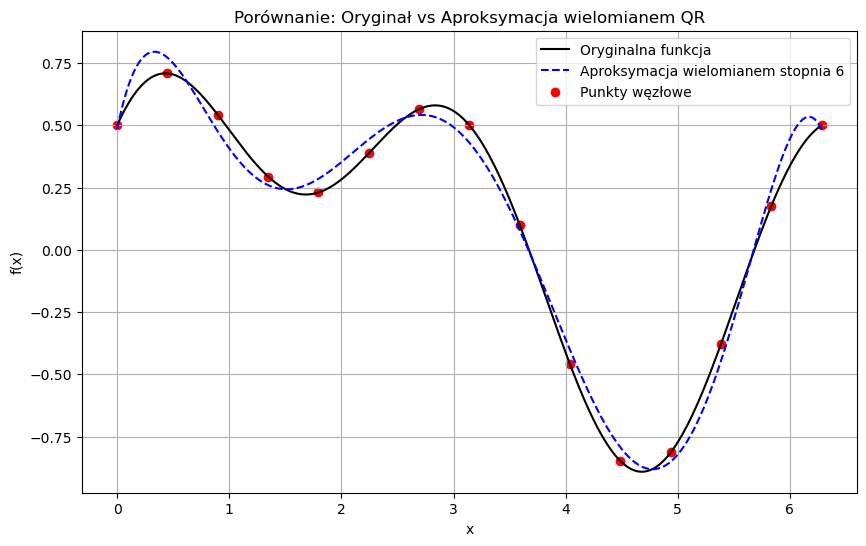

Współczynniki wielomianu aproksymującego (QR): [ 0.48459362  2.18862628 -4.83268265  3.56479025 -1.15831613  0.16932676
 -0.00910269]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Dane
x = np.linspace(0, 2*np.pi, 15)
y = np.sin(x) * np.exp(-0.2*x) + 0.5 * np.cos(2*x)

# Aproksymacja wielomianem (QR)
degree = 6
A = np.vstack([x**i for i in range(degree + 1)]).T
Q, R = np.linalg.qr(A)
coeffs = np.linalg.solve(R, Q.T @ y)

def approx_poly(x_vals, coeffs):
    return sum(c * x_vals**i for i, c in enumerate(coeffs))

# Gęste punkty do rysowania
x_dense = np.linspace(0, 2*np.pi, 300)
y_dense_original = np.sin(x_dense) * np.exp(-0.2*x_dense) + 0.5 * np.cos(2*x_dense)
y_dense_approx = approx_poly(x_dense, coeffs)

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(x_dense, y_dense_original, label="Oryginalna funkcja", color="black")
plt.plot(x_dense, y_dense_approx, label=f"Aproksymacja wielomianem stopnia {degree}", linestyle='--', color="blue")
plt.scatter(x, y, color='red', label="Punkty węzłowe")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Porównanie: Oryginał vs Aproksymacja wielomianem QR")
plt.legend()
plt.grid(True)
plt.show()

# Wydruk współczynników
print("Współczynniki wielomianu aproksymującego (QR):", coeffs)

### Opis wykonanej aproksymacji:

W celu dopasowania wielomianu do danych z wcześniejszego laboratorium, wykorzystano faktoryzację QR. Aproksymowany został zbiór **15 punktów** pochodzących z funkcji:


$f(x) = \sin(x) e^{-0.2x} + 0.5 \cos(2x)$


na przedziale $[0, 2\pi]$.  
Zbudowano układ równań dla wielomianu stopnia **6**.  
Faktoryzacja QR pozwoliła znaleźć współczynniki minimalizujące błąd średniokwadratowy.

---

### Wnioski:

- Aproksymacja wielomianowa dobrze odwzorowuje główny przebieg funkcji, szczególnie w środku przedziału.
- Na krańcach przedziału widoczne są niewielkie odchylenia (efekt Rungego), jednakże dzięki większej liczbie punktów (15 węzłów), są one mniej wyraźne niż przy mniejszej liczbie punktów.
- Ogólnie dopasowanie jest satysfakcjonujące, a zastosowanie faktoryzacji QR zapewnia stabilność numeryczną obliczeń i poprawność rozwiązania.

---

## Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 

## Zastosowanie faktoryzacji SVD w uczeniu maszynowym

### Opis teoretyczny

Faktoryzacja SVD (Singular Value Decomposition) rozkłada dowolną macierz $A$ (prostokątną lub kwadratową) w postaci:

$$
A = U \Sigma V^T
$$

gdzie:
- $U$ — macierz ortogonalna kolumn (wektory osobliwe lewe),
- $\Sigma$ — macierz diagonalna z wartościami osobliwymi (singular values),
- $V^T$ — transponowana macierz ortogonalna wierszy (wektory osobliwe prawe).

Wartości w $\Sigma$ są nieujemne i posortowane malejąco.

---

### Zastosowanie w uczeniu maszynowym

Faktoryzacja SVD ma szerokie zastosowanie w Machine Learning, m.in. do:

- **Redukcji wymiarowości** danych (np. w metodzie PCA — Principal Component Analysis),
- **Kompresji danych** (np. obrazów, tekstów),
- **Wykrywania anomalii** poprzez analizę wartości osobliwych.

Dzięki redukcji wymiarowości możliwe jest zmniejszenie rozmiaru zbioru danych przy zachowaniu najistotniejszych informacji.

---

### Przykład: Redukcja wymiarowości danych za pomocą SVD

Poniżej przedstawiono przykład redukcji danych 2D do 1D przy użyciu faktoryzacji SVD:


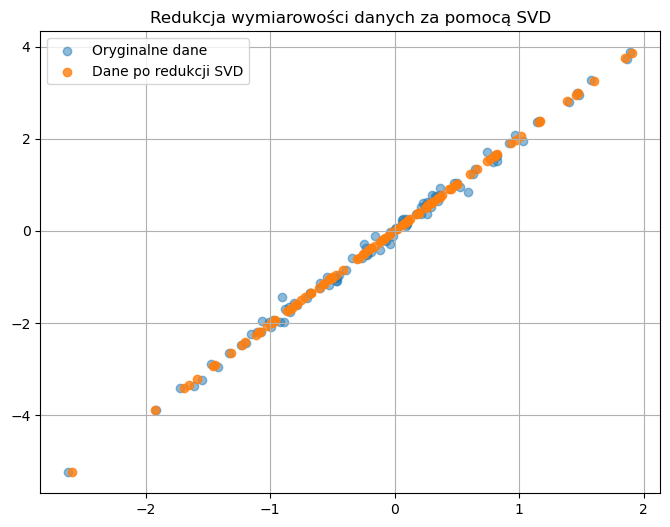

In [14]:

import numpy as np
import matplotlib.pyplot as plt

# Generowanie przykładowych danych 2D
np.random.seed(42)
X = np.random.randn(100, 2)
X[:,1] = 2*X[:,0] + 0.1*np.random.randn(100)

# Przeprowadzenie faktoryzacji SVD
U, S, Vt = np.linalg.svd(X - X.mean(axis=0), full_matrices=False)

# Redukcja do 1 głównej składowej
k = 1  # liczba głównych komponentów
S_reduced = np.zeros((k, k))
np.fill_diagonal(S_reduced, S[:k])
U_reduced = U[:, :k]
Vt_reduced = Vt[:k, :]

# Odtworzenie danych po redukcji
X_reduced = U_reduced @ S_reduced @ Vt_reduced + X.mean(axis=0)

# Wykres danych oryginalnych i zrekonstruowanych
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], label="Oryginalne dane", alpha=0.5)
plt.scatter(X_reduced[:,0], X_reduced[:,1], label="Dane po redukcji SVD", alpha=0.8)
plt.legend()
plt.title("Redukcja wymiarowości danych za pomocą SVD")
plt.grid(True)
plt.show()

### Analiza wykresu:

Na wykresie przedstawiono porównanie oryginalnych danych (niebieskie punkty) oraz danych po redukcji wymiarowości za pomocą SVD (pomarańczowe punkty).

Możemy zaobserwować, że pomarańczowe punkty leżą bardzo blisko oryginalnych niebieskich punktów.  
Oznacza to, że redukcja danych do jednej głównej składowej zachowała najistotniejszą strukturę danych.

Interpretacja wyniku:

- Oryginalne dane były w istocie prawie jednowymiarowe (prawie wszystkie punkty układają się wzdłuż jednej prostej).
- SVD prawidłowo wykryło główny kierunek zmienności i zredukowało dane bez znaczącej utraty informacji.
- Pokazuje to skuteczność SVD w redukcji wymiarowości danych przy zachowaniu ich istotnych własności.